In [1]:
using Distributions, Plots, GeometryBasics, VoronoiCells
default(size=(800,600))

In [2]:
lambda_c=50.0
lambda_a=5.0

area_a = 4;

Na = 20#rand(Poisson(lambda_a*area_a))

xa = rand(Uniform(-1,1),Na,2)

Nc = 200#rand(Poisson(lambda_c*area_a))
xc = rand(Uniform(-1,1),Nc,2);

In [3]:
d(x,y) = sqrt(sum((x-y).^2))
W = [d(xa[i,:],xc[j,:]) for i=1:Na,j=1:Nc]

attachs = zeros(Nc)

for j=1:Nc    
    _,idx = findmin(W[:,j])
    attachs[j] = idx
end
attachs=Int64.(attachs);

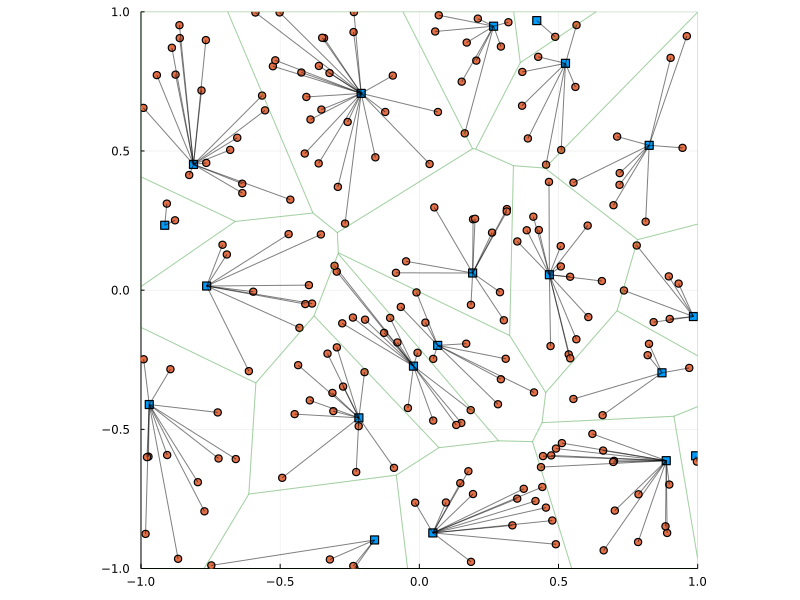

In [4]:
rect = Rectangle(Point2(-1.0, -1.0), Point2(1.0, 1.0))
Xa = Point2{Float64}[]
for i=1:size(xa,1)
    aux = Point2(xa[i,1],xa[i,2])
    push!(Xa,aux)
end
tess = voronoicells(Xa, rect);


scatter(xa[:,1],xa[:,2], xlims=(-1,1), ylims=(-1,1), aspectratio=:equal, marker=:square)
scatter!(xc[:,1], xc[:,2], legend=:none, colorbar=:none, background=RGB(0.9,0.9,0.95), axis=false,ticks=false)

for i=1:Nc
    plot!([xc[i,1],xa[attachs[i],1]], [xc[i,2],xa[attachs[i],2]], color=:black, alpha=0.5)
end

plot!(tess, alpha=0.2, color=:green)

In [5]:
using JuMP, Gurobi

n=size(xa,1)
m=size(xc,1)

const GRB_ENV = Gurobi.Env()

Gurobi.Env(Ptr{Nothing} @0x0000000003969ae0, false, 0)

In [12]:
model = Model(() -> Gurobi.Optimizer(GRB_ENV))

@variable(model,pi[1:m,1:n]>=0)

con1 = @constraint(model, sum(pi,dims=2).== ones(m))
con2 = @constraint(model, sum(pi,dims=1).<= 100*ones(1,n))

@objective(model,Min,sum(pi.*W'))

optimize!(model)

sol = value.(pi)

for i=1:Nc    
    _,idx = findmax(sol[i,:])
    attachs[i] = idx
end

attachs = Int64.(attachs);

Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (linux64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 220 rows, 4000 columns and 8000 nonzeros
Model fingerprint: 0x74964a30
Coefficient statistics:
  Matrix range     [1e+00, 1e+00]
  Objective range  [2e-02, 2e+00]
  Bounds range     [0e+00, 0e+00]
  RHS range        [1e+00, 1e+02]
Presolve time: 0.00s
Presolved: 220 rows, 4000 columns, 8000 nonzeros

Iteration    Objective       Primal Inf.    Dual Inf.      Time
       0    4.8323417e+01   0.000000e+00   0.000000e+00      0s

Solved in 0 iterations and 0.00 seconds (0.00 work units)
Optimal objective  4.832341692e+01

User-callback calls 36, time in user-callback 0.00 sec


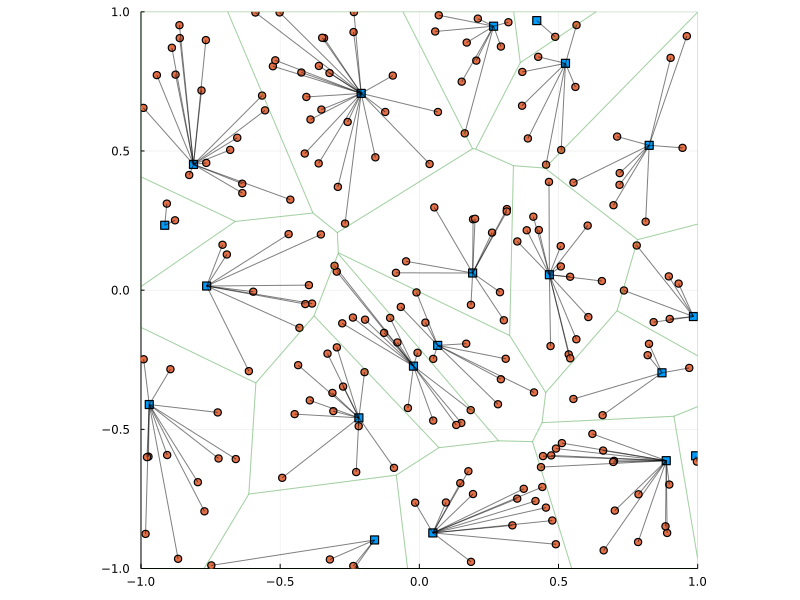

In [13]:
scatter(xa[:,1],xa[:,2], xlims=(-1,1), ylims=(-1,1), aspectratio=:equal, marker=:square)
scatter!(xc[:,1], xc[:,2], legend=:none, colorbar=:none)

for i=1:Nc
    plot!([xc[i,1],xa[attachs[i],1]], [xc[i,2],xa[attachs[i],2]], color=:black, alpha=0.5)
end

tess = voronoicells(Xa, rect);
plot!(tess, alpha=0.2, color=:green)